In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('Downloads/invasion.csv')

In [3]:
clf = RandomForestClassifier(random_state=0)

In [4]:
dt

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [5]:
X_train = dt.drop('class',axis = 1)

In [6]:
y_train = dt['class']

In [7]:
parametrs = {'max_depth': range(1,50,5), 'min_samples_leaf': range(1,10,2), 'min_samples_split': range(1,9)}

In [8]:
grid_search_cv_clf = GridSearchCV(clf,parametrs,cv = 5,n_jobs = -1)

In [9]:
grid_search_cv_clf.fit(X_train,y_train)

c:\users\bigre\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\bigre\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\bigre\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\users\bigre\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py"

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 50, 5),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 9)})

In [10]:
best_clf = grid_search_cv_clf.best_estimator_

In [11]:
X_test = pd.read_csv('Downloads/operative_information.csv')

In [13]:
pr = best_clf.predict(X_test)

In [15]:
pd.Series(pr).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [17]:
best_clf.feature_importances_

array([0.18529373, 0.09369417, 0.11752853, 0.27894357, 0.00068465,
       0.32385534])

In [18]:
feature_importance = pd.DataFrame(best_clf.feature_importances_, index = X_train.columns,columns=['importance'])

<AxesSubplot:>

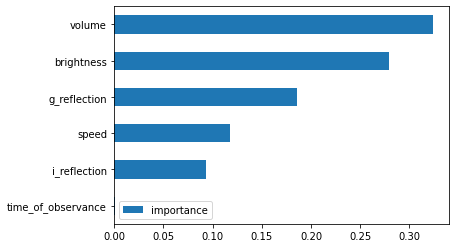

In [20]:
feature_importance.sort_values('importance').plot(kind = 'barh')